In [18]:
# by: Joao Roque

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
survey = pd.read_csv('../../data/survey.csv')
#survey['Profile'] = survey['Profile'].astype('category')

survey.head()

,Meetup #,City,Venue,Date,Profile,Motivation - Get in touch with companies,Motivation - Be part of the community,Motivation - Learn Techniques,Motivation - Drinking beers,Motivation - Meet Speakers,Motivation - Learn Technologies,Motivation - Discuss approaches/problems,Motivation - Other,Suggestions - workshops and meetups topics,Suggestions - Other,How was the meetup
0,15.0,Braga,Subvisual,18/10/2017,Professional,-,-,2,-,-,1,3,-,-,-,Good
1,15.0,Braga,Subvisual,18/10/2017,Interested,3,7,2,4,6,1,5,-,-,-,Good
2,15.0,Braga,Subvisual,18/10/2017,Interested,5,2,3,-,-,1,4,-,-,-,Good
3,15.0,Braga,Subvisual,18/10/2017,Interested,6,4,1,7,5,2,3,-,"Present real world scenarios, and also speak i...","for beginners, it could be interesting to talk...",Good
4,15.0,Braga,Subvisual,18/10/2017,Student,-,-,X,-,-,X,X,-,Processamento de Linguagem Natural,-,Good


## Let's Start with the real Questions here

Who are the ones most interested in drinking beer?

C:\Users\Joao_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


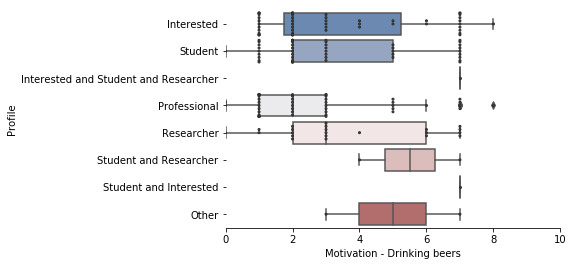

In [20]:
# Lot's of invalid answers ( 996 --> less than 200)
beer_survey = survey[survey['Motivation - Drinking beers'].astype(str).str.isdigit()]
beer_survey['Motivation - Drinking beers'] = [int(x) for x in beer_survey['Motivation - Drinking beers']]

# input: give me that dataframes
def hor_box(data):
    plt.figure()
    plt.xlim(0,10)
    sns.boxplot(x="Motivation - Drinking beers", y="Profile", data=data
                , palette="vlag")
    sns.swarmplot(x="Motivation - Drinking beers", y="Profile", data=data,
                  size=2, color=".3", linewidth=1)
    sns.despine(trim=True, left=True)
    
hor_box(beer_survey)

Looks like we have a few Professional Drinkers, aHaH! No? Okay, I'll see myself out...  
Some classes are really underrepresented here. Let's just remove them ¯\\_(ツ)_/¯

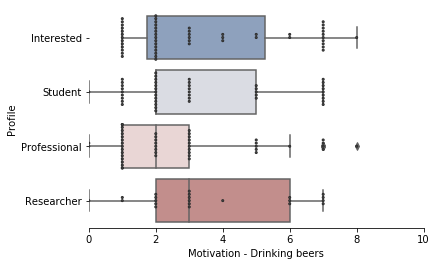

In [21]:
beer_survey = beer_survey.loc[beer_survey['Profile'].isin(['Interested', 'Professional', 'Researcher', 'Student'])]
beer_survey.head()

hor_box(beer_survey)

Turns out no one wants to admit their 10/10 alchool problem.